# Born to slide: mobile origin licensing factors confer resistance to conflicts with RNA polymerase

<img style="float: left;" src="https://icons.iconarchive.com/icons/dan-wiersma/solar-system/48/Mars-icon.png">

## Jupyter notebooks 

#### Figures:
+ 6H

#### Archives:

#### Additional data:
+ 210804_ORC-bypass-MCM-load_1.xlsx
+ 210804_ORC-bypass-MCM-load_2.xlsx
+ 210804_ORC-bypass-MCM-load_3.xlsx
+ 210804_ORC-bypass-MCM-load_4.xlsx

### Imports

In [1]:
import sys
sys.path.insert(0, '..')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import os


### Figure style and output directory

In [2]:
from figure_style import *

In [3]:
set_style_paper()

In [4]:
dir_out = '/Volumes/pool-duderstadt/Matthias/Manuscript/Figures/SVGs/Figure6+7/'
dir_out

'/Volumes/pool-duderstadt/Matthias/Manuscript/Figures/SVGs/Figure6+7/'

### Load dataset & overview

In [5]:
path = '/Volumes/pool-duderstadt/Matthias/Manuscript/Additional_data/ORC-bypass-MCM-load/'
files = []
# r=root, d=directories, f = files
for r, d, f in os.walk(path):
    for file in f:
        if '.csv' in file:
            files.append(os.path.join(r, file))

In [6]:
df = pd.DataFrame()
for file in files:
    df_temp = pd.read_csv(file, sep=';', header=[0])
    df = pd.concat([df, df_temp])

In [7]:
df.head()

,Molecule,ORC_before,ORC_after,transcription,collision_outcome,MCM_after,MCM_bleaching_steps,tags,comments
0,0,0,0,1,NaN,0,NaN,NaN,NaN
1,1,0,0,1,NaN,1,NaN,reject,RNAP stuck
2,2,1,0,0,NaN,0,NaN,NaN,NaN
3,3,0,0,0,NaN,1,NaN,NaN,NaN
4,4,1,1,1,b,1,NaN,NaN,NaN


In [8]:
len(df)

1595

In [9]:
# if no collision happened => na
df['collision_outcome'].fillna('na', inplace=True)

In [10]:
# remove rejected molecules
df = df[(df['tags']!='reject') & (df['collision_outcome']!='s')]
len(df)

1530

In [11]:
df.groupby(['ORC_before', 'collision_outcome'])['MCM_after'].describe()

count      mean       std  min  25%  50%  75%  \
ORC_before collision_outcome                                                  
0          na                 679.0  0.444772  0.497307  0.0  0.0  0.0  1.0   
1          b                  171.0  0.812865  0.391165  0.0  1.0  1.0  1.0   
           na                 519.0  0.799615  0.400675  0.0  1.0  1.0  1.0   
           oe                  27.0  0.370370  0.492103  0.0  0.0  0.0  1.0   
           p                   90.0  0.422222  0.496681  0.0  0.0  0.0  1.0   
           re                  44.0  0.795455  0.408032  0.0  1.0  1.0  1.0   

                              max  
ORC_before collision_outcome       
0          na                 1.0  
1          b                  1.0  
           na                 1.0  
           oe                 1.0  
           p                  1.0  
           re                 1.0

In [12]:
df['x_label'] = df['ORC_before'].apply(lambda value: 'ORC+' if value else 'ORC-') + df['collision_outcome']
df

,Molecule,ORC_before,ORC_after,transcription,collision_outcome,MCM_after,MCM_bleaching_steps,tags,comments,x_label
0,0,0,0,1,na,0,NaN,NaN,NaN,ORC-na
2,2,1,0,0,na,0,NaN,NaN,NaN,ORC+na
3,3,0,0,0,na,1,NaN,NaN,NaN,ORC-na
4,4,1,1,1,b,1,NaN,NaN,NaN,ORC+b
5,5,1,0,0,na,1,NaN,NaN,NaN,ORC+na
...,...,...,...,...,...,...,...,...,...,...
398,398,0,0,1,na,0,NaN,NaN,NaN,ORC-na
399,399,1,0,0,na,1,NaN,NaN,NaN,ORC+na
400,400,0,0,1,na,1,NaN,NaN,NaN,ORC-na
401,401,0,0,0,na,0,NaN,NaN,NaN,ORC-na


## Figures

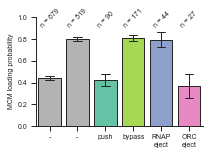

In [13]:
fig,axes = plt.subplots(figsize=(3,2))

sns.barplot(x='x_label', y='MCM_after', data=df, order='ORC-na ORC+na ORC+p ORC+b ORC+re ORC+oe'.split(),
            palette=[palettes['qualitative'][7],palettes['qualitative'][7],palettes['qualitative'][0],
                     palettes['qualitative'][4],palettes['qualitative'][2],palettes['qualitative'][3]],
            lw=1, edgecolor='.15', capsize=.3,errwidth=1, ax=axes, saturation=1.0,
            n_boot=10000, seed=42, ci=68, errcolor='.15')

axes.set_xlabel(None)
axes.set_ylabel('MCM loading probability')
axes.set_ylim(0,1)
# axes.tick_params(axis='x', rotation=45)

#calculate number of observations
nobs = {k:v for k,v in df['x_label'].value_counts().items()}

#put nobs into plot
pos = range(len(nobs))
for tick,label in zip(pos,axes.get_xticklabels()):
    
    transform=axes.transAxes,axes.text(pos[tick], 0.9, "n = "+str(nobs[label.get_text()]),
    horizontalalignment='center',verticalalignment='bottom', rotation=45)

    
axes.set_xticklabels(['-', '-', 'push', 'bypass', 'RNAP\neject', 'ORC\neject'])
sns.despine()
#plt.tight_layout()

plt.savefig(dir_out+'ORC-bypass-MCM-load.svg',transparent=True)

### Figure 6H: MCM load vs RNAP-ORC collision outcome

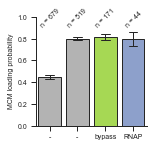

In [14]:
fig,axes = plt.subplots(figsize=(2,2))

sns.barplot(x='x_label', y='MCM_after', data=df, order='ORC-na ORC+na ORC+b ORC+re'.split(),
            palette=[palettes['qualitative'][7],palettes['qualitative'][7],
                     palettes['qualitative'][4],palettes['qualitative'][2]],
            lw=1, edgecolor='.15', capsize=.3,errwidth=1, ax=axes, saturation=1.0,
            n_boot=10000, seed=42, ci=68, errcolor='.15')

axes.set_xlabel(None)
axes.set_ylabel('MCM loading probability')
axes.set_ylim(0,1)
# axes.tick_params(axis='x', rotation=45)

#calculate number of observations
nobs = {k:v for k,v in df['x_label'].value_counts().items()}

#put nobs into plot
pos = range(len(nobs))
for tick,label in zip(pos,axes.get_xticklabels()):
    
    transform=axes.transAxes,axes.text(pos[tick], 0.9, "n = "+str(nobs[label.get_text()]),
    horizontalalignment='center',verticalalignment='bottom', rotation=45)

    
axes.set_xticklabels(['-', '-', 'bypass', 'RNAP'])
sns.despine()
#plt.tight_layout()

plt.savefig(dir_out+'6H_ORC-bypass-MCM-load_partial.svg',transparent=True)